In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_text
import matplotlib.pyplot as plt
import numpy as np

In [44]:
data = pd.read_csv('breast-cancer.csv')
data = data.drop(columns=['id'])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [36]:
TARGET = 'diagnosis'

In [37]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


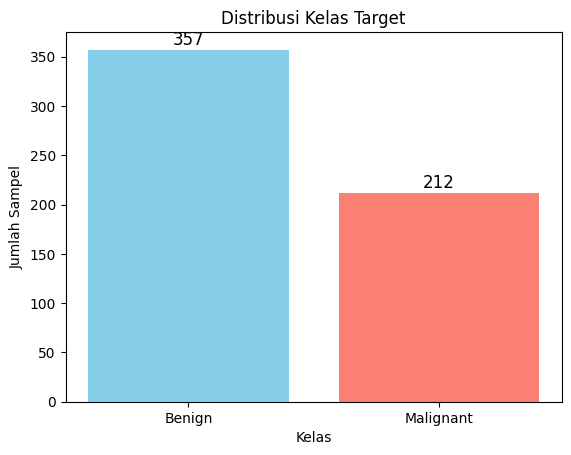

In [38]:
import matplotlib.pyplot as plt

# Distribusi kelas target
class_counts = data[TARGET].value_counts()
plt.bar(['Benign', 'Malignant'], class_counts, color=['skyblue', 'salmon'])

# Tambahkan anotasi
for i, count in enumerate(class_counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.title('Distribusi Kelas Target')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')
plt.show()


In [39]:
TARGET = 'diagnosis'
X = data.drop(columns=[TARGET])  # Semua fitur kecuali target
y = data[TARGET]  # Target

# Pembagian dataset menjadi 70:30 dengan stratifikasi pada target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [40]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
78,20.18,23.97,143.70,1245.0,0.12860,0.34540,0.37540,0.16040,0.2906,0.08142,0.9317,1.8850,8.649,116.40,0.010380,0.068350,0.109100,0.025930,0.07895,0.005987,23.37,31.72,170.30,1623.0,0.16390,0.61640,0.76810,0.25080,0.5440,0.09964
330,16.03,15.51,105.80,793.2,0.09491,0.13710,0.12040,0.07041,0.1782,0.05976,0.3371,0.7476,2.629,33.27,0.005839,0.032450,0.037150,0.014590,0.01467,0.003121,18.76,21.98,124.30,1070.0,0.14350,0.44780,0.49560,0.19810,0.3019,0.09124
378,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,0.1402,0.5417,1.101,11.35,0.005212,0.029840,0.024430,0.008356,0.01818,0.004868,14.54,19.64,97.96,657.0,0.12750,0.31040,0.25690,0.10540,0.3387,0.09638
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,0.5296,1.6670,3.767,58.53,0.031130,0.085550,0.143800,0.039270,0.02175,0.012560,18.07,28.07,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818
89,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,0.5115,0.7372,3.814,42.76,0.005508,0.044120,0.044360,0.016230,0.02427,0.004841,16.34,18.24,109.40,803.6,0.12770,0.30890,0.26040,0.13970,0.3151,0.08473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.3420,1.170,14.16,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,0.2747,1.2030,1.930,19.53,0.009895,0.030530,0.016300,0.009276,0.02258,0.002272,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,0.2621,1.2320,1.657,21.19,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,0.3478,1.0180,2.749,31.01,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('breast-cancer.csv')

# Definisikan target dan fitur
TARGET = 'diagnosis'
X = data.drop(columns=[TARGET])  # Semua kolom kecuali kolom target
y = data[TARGET]  # Kolom target

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Train Decision Tree
tree_clf = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3, 
                                  random_state=42)
tree_clf.fit(X_train, y_train)

# Prediksi
y_pred = tree_clf.predict(X_test)

# Evaluasi Akurasi dan Metrik Lainnya
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Buat DataFrame untuk Tabel Hasil Evaluasi
results = {
    "Metric": ["Accuracy", "Balanced Accuracy"],
    "Score": [accuracy, balanced_accuracy]
}
results_df = pd.DataFrame(results)

# Tampilkan Hasil Evaluasi
print("\nHasil Evaluasi Model Decision Tree:")
results_df


Hasil Evaluasi Model Decision Tree:


,Metric,Score
0,Accuracy,0.918129
1,Balanced Accuracy,0.890625



Aturan Pohon Keputusan:
|--- perimeter_worst <= 112.80
|   |--- concave points_worst <= 0.18
|   |   |--- texture_mean <= 21.32
|   |   |   |--- class: B
|   |   |--- texture_mean >  21.32
|   |   |   |--- class: B
|   |--- concave points_worst >  0.18
|   |   |--- class: M
|--- perimeter_worst >  112.80
|   |--- concave points_worst <= 0.14
|   |   |--- texture_worst <= 21.85
|   |   |   |--- class: B
|   |   |--- texture_worst >  21.85
|   |   |   |--- class: M
|   |--- concave points_worst >  0.14
|   |   |--- class: M



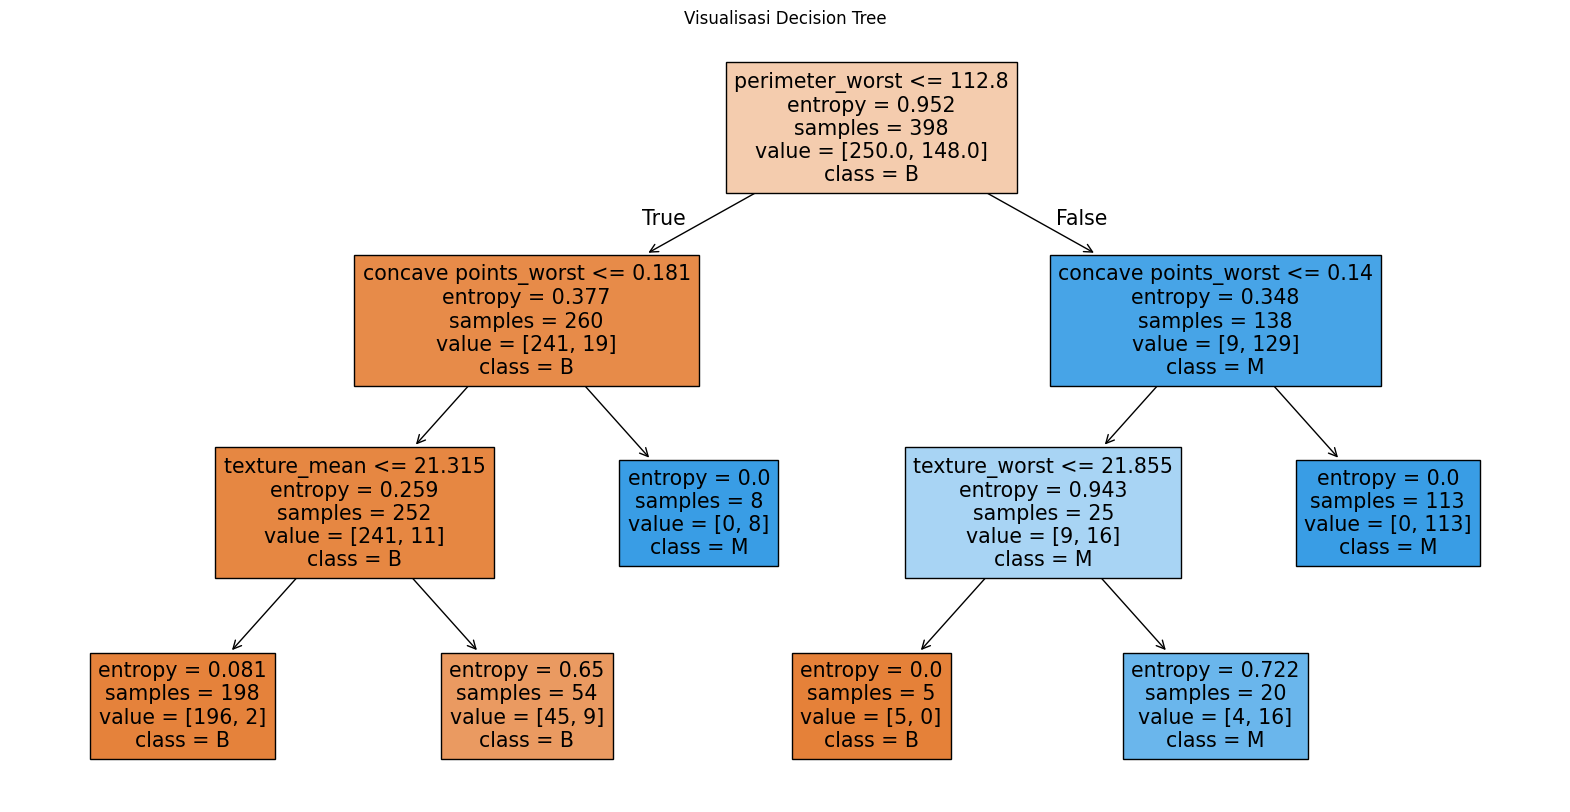


Entropy Root Node: 0.9520890193411204

Weighted Entropy After Split: 0.6360901611352392

Information Gain dari Pembagian Pertama: 0.31599885820588125


In [68]:
# Export tree as text
feature_names = [col for col in data.columns if col != TARGET]  # Semua kolom kecuali target
tree_rules = export_text(tree_clf, feature_names=feature_names)
print("\nAturan Pohon Keputusan:")
print(tree_rules)

# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=feature_names, class_names=tree_clf.classes_, filled=True)
plt.title("Visualisasi Decision Tree")
plt.show()

# Fungsi untuk menghitung Entropy
def entropy(classes):
    total = sum(classes)
    probs = [c / total for c in classes]
    return -sum([p * np.log2(p) for p in probs if p > 0])

# Menampilkan perhitungan Entropy dan Information Gain untuk simpul pertama
root_node_samples = tree_clf.tree_.value[0][0]  # Total samples di root node
malignant, benign = root_node_samples  # Ambil kelas malignant dan benign
root_entropy = entropy([malignant, benign])
print("\nEntropy Root Node:", root_entropy)

# Akses jumlah sampel setelah pembagian
left_node_samples = tree_clf.tree_.value[1][0]  # Simpul kiri
right_node_samples = tree_clf.tree_.value[2][0]  # Simpul kanan

# Hitung entropy untuk simpul kiri dan kanan
left_entropy = entropy(left_node_samples)
right_entropy = entropy(right_node_samples)

# Rata-rata Entropy setelah pembagian
total_samples = malignant + benign
weighted_entropy = (
    (sum(left_node_samples) / total_samples) * left_entropy
    + (sum(right_node_samples) / total_samples) * right_entropy
)
print("\nWeighted Entropy After Split:", weighted_entropy)

# Information Gain
info_gain = root_entropy - weighted_entropy
print("\nInformation Gain dari Pembagian Pertama:", info_gain)

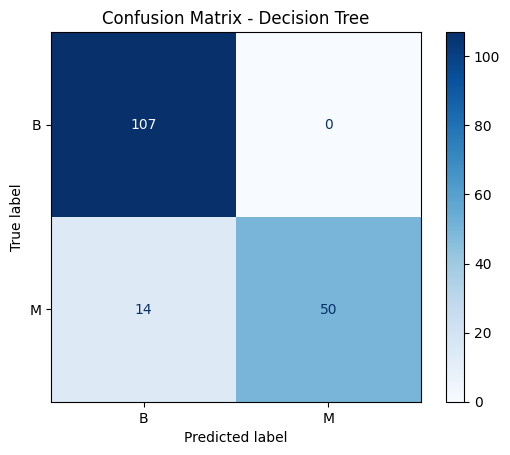

Akurasi: 0.9181286549707602

Laporan Klasifikasi:
              precision    recall  f1-score   support

           B       0.88      1.00      0.94       107
           M       1.00      0.78      0.88        64

    accuracy                           0.92       171
   macro avg       0.94      0.89      0.91       171
weighted avg       0.93      0.92      0.92       171



In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Prediksi pada dataset testing
y_pred = tree_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Skor Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
import pandas as pd

# Train Random Forest dengan kriteria Entropy
forest_clf = RandomForestClassifier(n_estimators=1000, 
                                    criterion='entropy', 
                                    random_state=42,
                                    max_depth=3)
forest_clf.fit(X_train, y_train)

# Prediksi
y_pred = forest_clf.predict(X_test)


In [76]:
# Evaluasi Akurasi dan Metrik Lainnya
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Buat DataFrame untuk Tabel Hasil Evaluasi
results = {
    "Metric": ["Accuracy", "Balanced Accuracy"],
    "Score": [accuracy, balanced_accuracy]
}
results_df = pd.DataFrame(results)

# Tampilkan Hasil Evaluasi
print("\nHasil Evaluasi Model Random Forest:")
results_df


Hasil Evaluasi Model Random Forest:


,Metric,Score
0,Accuracy,0.959064
1,Balanced Accuracy,0.945312


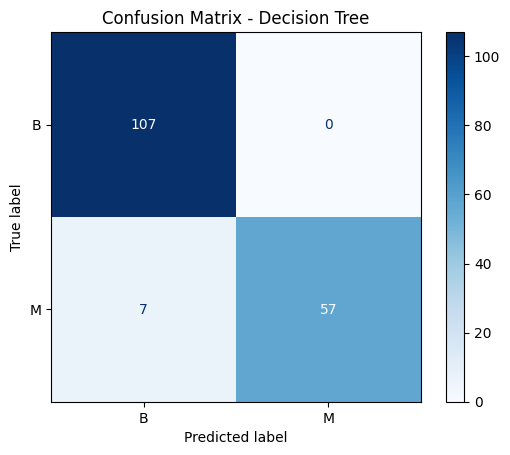

Akurasi: 0.9590643274853801

Laporan Klasifikasi:
              precision    recall  f1-score   support

           B       0.94      1.00      0.97       107
           M       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Prediksi pada dataset testing
y_pred = forest_clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=forest_clf.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Skor Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

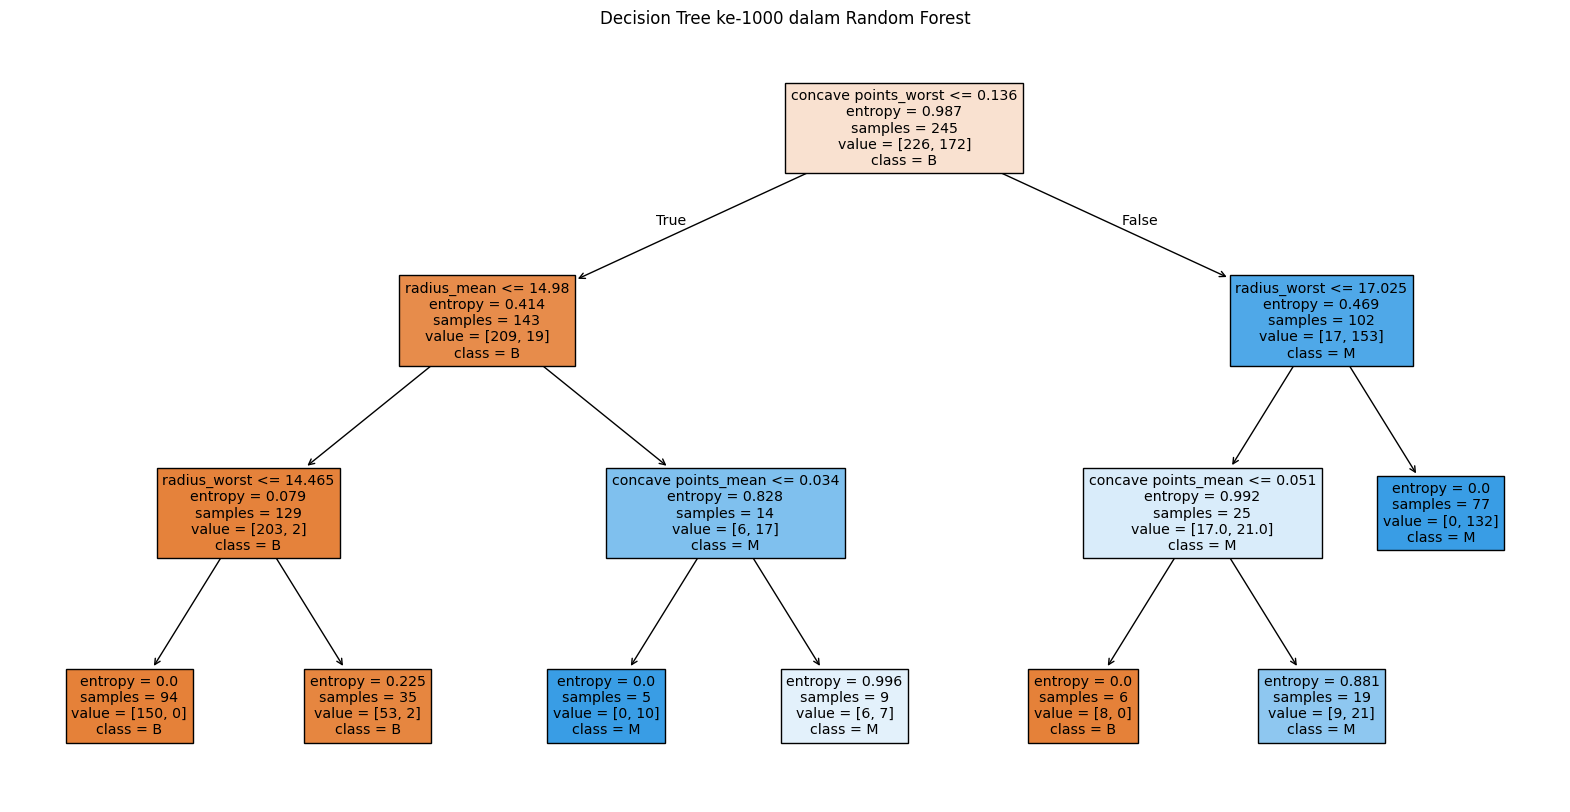

In [81]:
# Pilih salah satu Decision Tree dari Random Forest
tree_index = 999  # Memilih pohon pertama
single_tree = forest_clf.estimators_[tree_index]

# Visualisasi Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X.columns, class_names=forest_clf.classes_, filled=True)
plt.title(f"Decision Tree ke-{tree_index+1} dalam Random Forest")
plt.show()

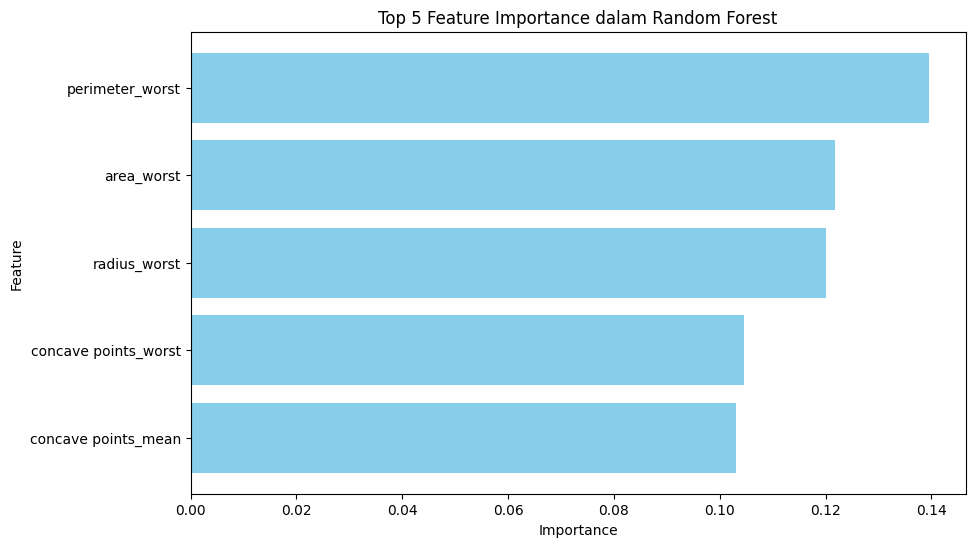

In [83]:
import matplotlib.pyplot as plt

# Mendapatkan Feature Importance
feature_importances = forest_clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Filter Top 5 Fitur
top_5_features = importance_df.head(5)

# Visualisasi Top 5 Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 5 Feature Importance dalam Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()